# [프로젝트2] 시계열 데이터 전처리 방법 알아보기
---


## 프로젝트 목표
---
- 데이터셋 내에 존재하는 결측치를 보간법을 활용하여 대체하는 방법을 알아봅니다.
- 데이터셋 내에 존재하는 변수값의 범위를 비슷하게 만들어주는 정규화와 표준화를 진행하는 방법을 알아봅니다.


## 프로젝트 목차
---

1. **데이터 불러오기:** 전처리를 진행할 데이터셋을 불러옵니다.

2. **결측치 처리하기 (보간법):** 데이터셋 내에 존재하는 결측치 개수를 확인하고, 보간법을 활용하여 결측치를 대체하는 방법을 알아봅니다.

3. **데이터 정규화와 표준화:** 변수 값의 범위를 유사하게 만들어주기 위한 정규화와 표준화를 진행하는 방법을 알아봅니다.



## 프로젝트 개요
---

cell id `1004_0`인 데이터를 활용하여 시계열 데이터 전처리(결측치 대체, 정규화, 표준화) 방법을 알아봅니다. 


## 1. 데이터 불러오기
---

전처리를 진행할 데이터셋을 불러오고, 기초 구조를 확인합니다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

#plt.rcParams['axes.unicode_minus']=False

In [2]:
df=pd.read_csv('./1004_0.csv')

In [3]:
df.head(30)

,New,dl_bler,ul_bler,conn_avg,conn_max,interx2in_succ_rate,interx2out_succ_rate,intraenb_succ_rate,dl_prb,ul_prb,reconfig_succ_rate
0,1004_0-20210901-0,7.551555,14.944129,27.913285,43.0,97.523220,100.000000,100.000000,45.402603,59.021408,100.409763
1,1004_0-20210901-1,8.685262,11.891272,23.013333,36.0,98.170732,NaN,100.000000,36.740540,21.128778,99.953052
2,1004_0-20210901-2,7.186353,12.175938,22.158977,38.0,98.039216,98.765432,100.000000,28.568421,15.338933,100.249377
3,1004_0-20210901-3,6.350503,11.190096,18.396667,34.0,98.717949,100.000000,100.000000,16.503713,8.009815,100.512821
4,1004_0-20210901-4,7.859695,14.823305,14.173889,28.0,97.014925,100.000000,100.000000,14.133542,5.109716,99.923136
5,1004_0-20210901-5,8.948004,25.274822,12.871039,29.0,97.512438,100.000000,99.000000,15.288279,6.401095,100.227376
6,1004_0-20210901-6,9.905244,25.067347,17.458032,31.0,97.309417,99.764151,100.000000,24.016486,10.163229,99.841994
7,1004_0-20210901-7,13.571006,30.241801,20.591111,36.0,96.575342,100.000000,100.000000,28.959573,17.167098,98.421994
8,1004_0-20210901-8,11.900041,32.305805,20.350195,37.0,97.751606,99.794450,99.358974,35.413158,21.013371,97.497792
9,1004_0-20210901-9,10.578136,25.461375,24.282222,39.0,97.994769,100.000000,99.761337,32.513267,28.521619,97.592319


## 2. 결측치 처리하기 (보간법)
---

데이터 분석 수학 분야에서 "보간법(Interpolation)은 데이터 포인트들의 이산형 집합의 범위에 기반해서 새로운 데이터 포인트들을 만들거나 찾는 추정(estimation)의 한 유형＂입니다. 이번 시간에는 이러한 보간법을 활용하여 데이터 셋 내에 존재하는 결측치를 직접 처리해보겠습니다. 

#### 결측값 갯수

In [4]:
df.isnull().sum()

New                       0
dl_bler                  95
ul_bler                  96
conn_avg                109
conn_max                109
interx2in_succ_rate      86
interx2out_succ_rate    131
intraenb_succ_rate      116
dl_prb                  114
ul_prb                  114
reconfig_succ_rate       91
dtype: int64

#### df_temp 복제

In [5]:
df_temp=df.copy()

#### 보간법 

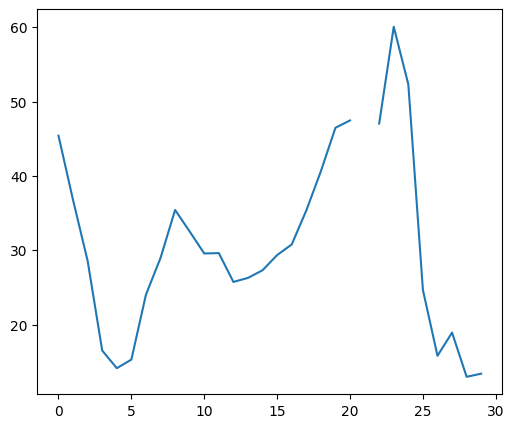

In [6]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(30),df['dl_prb'][0:30])

plt.show()

### 보간방법 시작
- interpolate() #선형 보간

In [7]:
dl_prb_inter=df['dl_prb'].interpolate()

In [9]:
!pip install Scipy

  Obtaining dependency information for Scipy from https://files.pythonhosted.org/packages/ea/b5/29fece1a74c6a94247f8a6fb93f5b28b533338e9c34fdcc9cfe7a939a767/scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 814.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.4 MB 6.1 MB/s eta 0:00:07
    --------------------------------------- 0.8/38.4 MB 9.6 MB/s eta 0:00:04
   - -------------------------------------- 1.6/38.4 MB 12.5 MB/s eta 0:00:03
   -- ------------------------------------- 2.6/38.4 MB 15.1 MB/s eta 0:00:03
   ---- ----------------------------------- 4.0/38.4 MB 18.2 MB/s eta 0:00:02
   ----- ---------------------------------- 5.6/38.4 MB 20.9 MB/s eta 0:00:02
   ------- ----------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
dl_prb_inter_2=df['dl_prb'].interpolate(method='polynomial', order=2)

In [11]:
df_temp['dl_prb_2']=dl_prb_inter

In [12]:
df_temp['dl_prb_3']=dl_prb_inter_2

In [13]:
df_temp.isnull().sum()

New                       0
dl_bler                  95
ul_bler                  96
conn_avg                109
conn_max                109
interx2in_succ_rate      86
interx2out_succ_rate    131
intraenb_succ_rate      116
dl_prb                  114
ul_prb                  114
reconfig_succ_rate       91
dl_prb_2                  0
dl_prb_3                  0
dtype: int64

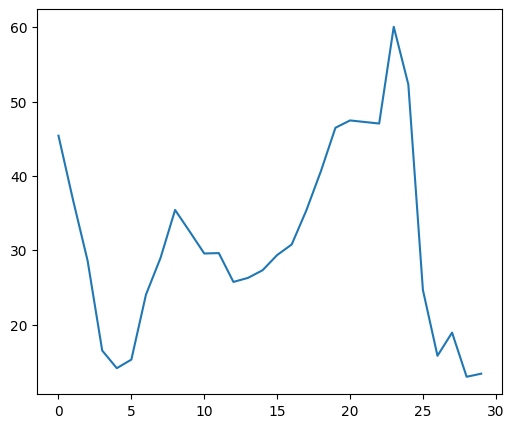

In [14]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(30),df_temp['dl_prb_2'][0:30])

plt.show()

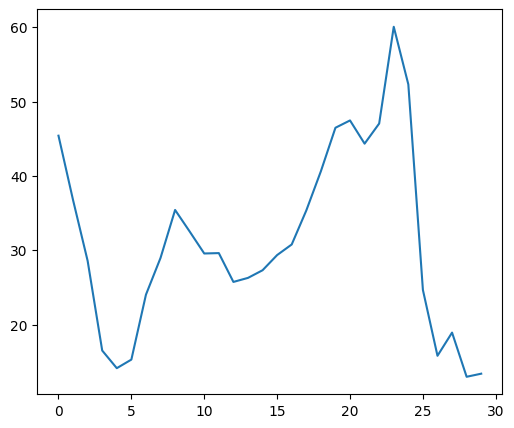

In [15]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(30),df_temp['dl_prb_3'][0:30])

plt.show()

<Axes: >

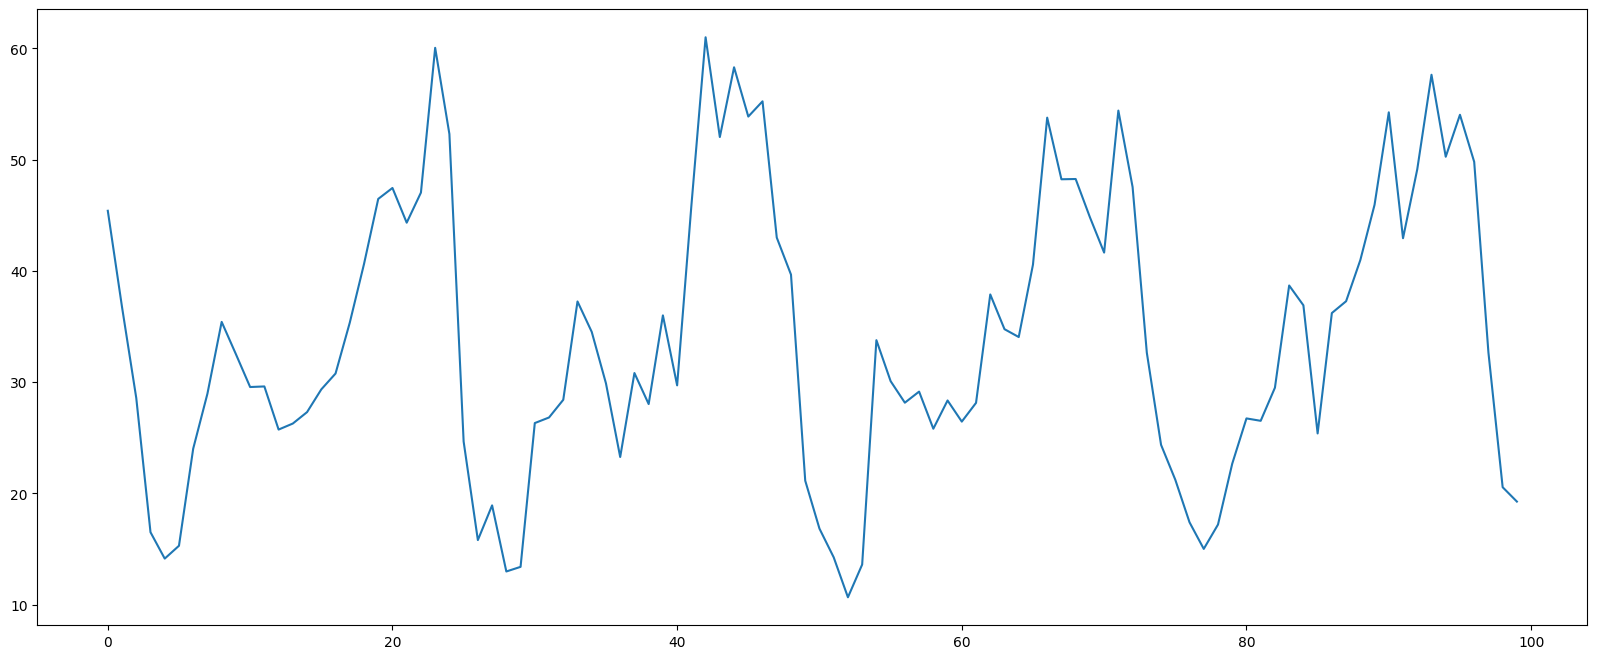

In [16]:
plt.rcParams["figure.figsize"] = (20,8)
df_temp['dl_prb_3'][0:100].plot()

### [TODO] "interx2out_succ_rate" 변수를 0번부터 30번까지 시각화 하시오.

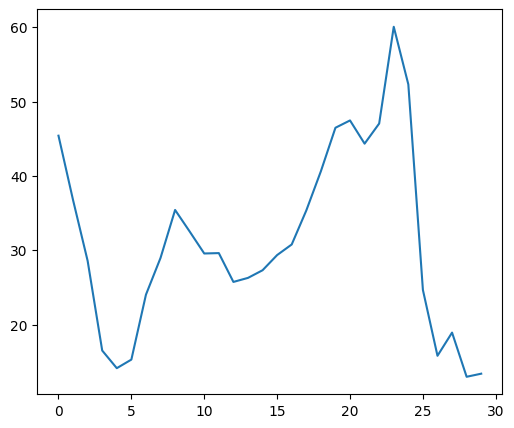

In [18]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(30),df_temp['dl_prb_3'][0:30])

plt.show()

### [TODO] 보간법 함수(interpolate) 이용하여 "interx2out_succ_rate" 변수의 NaN 값을 채워넣으시오. 

In [19]:
interx2out_succ_rate_inter_test= df_temp['dl_prb_3'].interpolate(method='polynomial', order=2)

In [20]:
interx2out_succ_rate_inter_test.isnull().sum()

np.int64(0)

## 3. 데이터 정규화와 표준화
---

정규화와 표준화는 각각의 변수의 단위가 다르기 때문에 변수들의 값의 범위를 비슷하게 만들어주는 과정입니다. 

sklearn의 StandardScaler와 MinMaxScaler를 활용하여 데이터의 정규화와 표준화를 진행해보겠습니다. 

In [23]:
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/15/fa/c61a787e35f05f17fc10523f567677ec4eeee5f95aa4798dbbbcd9625617/scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/7d/4f/1195bbac8e0c2acc5f740661631d8d750dc38d4a32b23ee5df3cde6f4e0d/joblib-1.5.1-py3-none-any.whl.metadata
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB 660.6 kB/s eta 0:00:14
   - -------------------------------------- 0.4/8.7 MB 4.6 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
df_dl_prb=df_temp['dl_prb_3'].values.reshape(-1, 1)

In [26]:
# normalize
scaler_1 = MinMaxScaler()
df_scaled_1 = scaler_1.fit_transform(df_dl_prb)

# standardize
scaler_2 = StandardScaler()
df_scaled_2 = scaler_2.fit_transform(df_dl_prb)

In [27]:
df_temp['dl_prb_3'].shape

(2184,)

In [28]:
df_dl_prb.shape

(2184, 1)

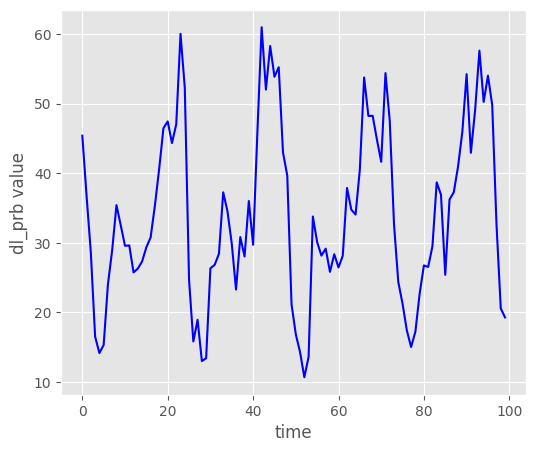

In [29]:
# original
plt.style.use('ggplot')
plt.figure(figsize=(6,5))
plt.xlabel('time')
plt.ylabel('dl_prb value')
plt.plot(np.arange(100), df_temp['dl_prb_3'][0:100], color='b')
plt.show()

In [30]:
import numpy as np

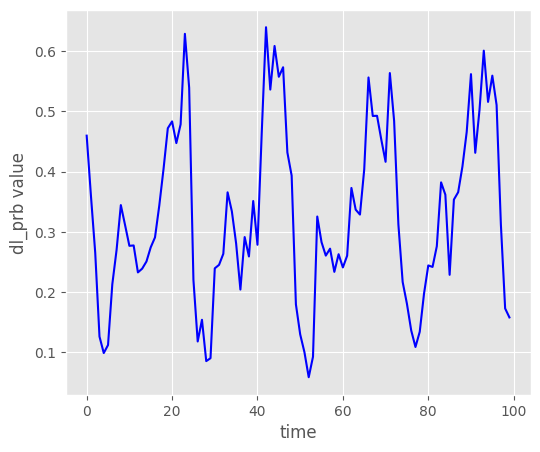

In [31]:
# Normalize
scaler_2 = MinMaxScaler()
df_scaled_2 = scaler_2.fit_transform(df_dl_prb)

plt.style.use('ggplot')
plt.figure(figsize=(6,5))
plt.xlabel('time')
plt.ylabel('dl_prb value')
plt.plot(np.arange(100), df_scaled_2[:100], color='b')
#plt.ylim(0, 0.7)
plt.show()

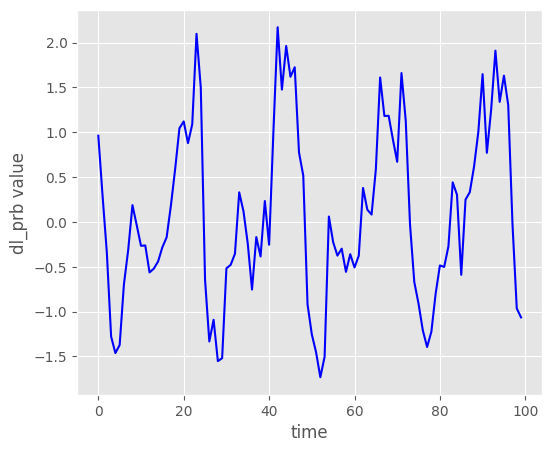

In [32]:
# standardize
scaler_1 = StandardScaler()
df_scaled_1 = scaler_1.fit_transform(df_dl_prb)

plt.style.use('ggplot')
plt.figure(figsize=(6,5))
plt.xlabel('time')
plt.ylabel('dl_prb value')
plt.plot(np.arange(100), df_scaled_1[:100], color='b')
#plt.ylim(-3, 3)
plt.show()